## Esame di Metodi Numerici

21 Luglio 2023

# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione, **Punti 1**
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 6**
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini della velocità di convergenza  dei due metodi alla soluzione, richiamando il risultato teorico visto a lezione.**Punti 2**

 - Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1. Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  **Punti 2**
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


In [79]:
from scipy.io import loadmat
from RisolviSis import Lsolve, Usolve
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

(300, 300)
A è quadrata? True
A è sparsa? True
A è definita positiva? True


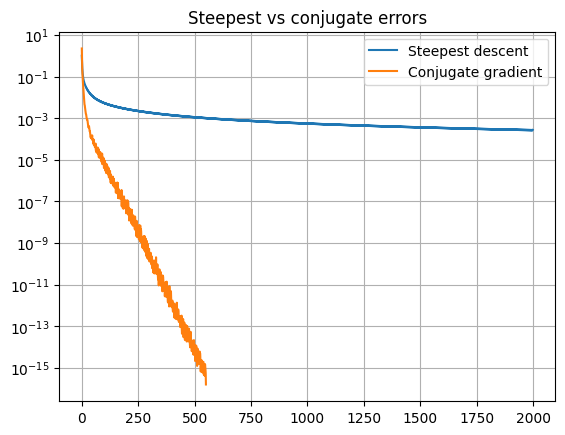

In [80]:
dati = loadmat('testI.mat')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

print(A.shape) # A è grande
print("A è quadrata?", A.shape[0] == A.shape[1]) # è quadrata

def is_sparse(A):
    return np.count_nonzero(A) / A.size < .33

print("A è sparsa?", is_sparse(A))

def is_def_pos(A):
    def is_symm(A):
        return np.allclose(A, A.T, atol=np.spacing(1))
    return is_symm(A) and np.all(np.linalg.eigvals(A) > 0)

print("A è definita positiva?", is_def_pos(A))

def steepest_descent(A, b, x0, maxit, toll=np.spacing(1)):
    x_curr = x0.copy()
    attempts = [ x_curr ]
    errors = [ ]
    while len(attempts) < maxit:
        # Aggiorno residuo
        r_k = A @ x_curr - b
        # Direzione di discesa
        p_k = -r_k
        # Step size
        alpha_k = (r_k @ r_k) / ((A @ r_k) @ r_k)
        # Aggiorno iterato
        x_curr += alpha_k * p_k
        attempts.append(x_curr)
        error = np.linalg.norm(r_k) / np.linalg.norm(b)
        errors.append(error)

        if np.abs(error) < toll:
            break
    return attempts[-1], len(attempts), errors

x0 = np.zeros((A.shape[0],))
steepest_res, steepest_attempts, steepest_errors = steepest_descent(A, b.reshape((A.shape[0],)), x0, 2000, 1e-6)

def conjugate_gradient(A, b, x0, itmax, toll=np.spacing(1)):
    m, n = A.shape
    if m != n:
        print("A non quadrata!")
        return None, None, None, None
    attempts = []
    errors = []
    x_curr = x0.copy()
    r_next, r_curr = None, A @ x_curr - b
    p_next, p_curr = None, -r_curr
    stop = False
    
    while not stop:
        step_size = (r_curr @ r_curr) / ((A @ p_curr) @ p_curr)
        x_curr += step_size * p_curr
        attempts.append(x_curr)
        
        r_next = A @ x_curr - b
        lambda_k = (r_next @ r_next) / (r_curr @ r_curr)
        p_next = -r_next + lambda_k * p_curr 
        
        error = np.linalg.norm(r_next) ** 2
        errors.append(error)
        
        if error < toll or len(attempts) > itmax:
            stop = True
        else:
            p_curr = p_next
            r_curr = r_next

    return x_curr, len(attempts), errors

x0 = np.zeros((A.shape[0],))
conjugate_res, conjugate_attempts, conjugate_errors = conjugate_gradient(A, b.reshape((A.shape[0],)), x0, 2000)

plt.semilogy(
    range(len(steepest_errors)), steepest_errors,
    range(len(conjugate_errors)), conjugate_errors
)
plt.title("Steepest vs conjugate errors")
plt.legend([
    "Steepest descent", "Conjugate gradient"
])
plt.grid(True)
plt.show()

In [40]:
condA = np.linalg.cond(A)
print(condA)
# A è altamente malcondizionata!

10000.000000002668


In [41]:
A1 = A + (0.05 * np.eye(A.shape[0], A.shape[1]))
b1 = np.sum(A1, axis=1)

print(np.linalg.cond(A1)) # A1, a differenza di A, è ben condizionata

20.958083832335326


# Esercizio 2

Siano assegnati i vettori
$$
x = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0] , $$
$$
y = [1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59] 
$$

contenenti rispettivamente le ascisse e le ordinate di 11 punti del piano.

Scrivere lo script  in cui
 - si determini il polinomio di approssimazione ai minimi quadrati di grado 1 dei  punti assegnati sviluppando  le functions necessarie; **Punti: 4**
- si determini il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie;  **Punti: 4**
- si consideri il set di dati ($x_i,\hat{y}_i$) , dove $\hat{y}_i = 0.2 x_i+1$, $i = 0, ..., 10$ e si ricalcolino il polinomio di approssimazione ai minimi quadrati di grado 1 e il polinomio di interpolazione a partire dai nuovi punti $(x_i, \hat{y}_i)$, i = 0, ..., 10; **Punti: 1**
- si rappresentino in figura 1 (rispettivamente in figura 2) il primo (rispettivamente il secondo) set di punti assegnato insieme al polinomio di approssimazione ai minimi quadrati e al polinomio di interpolazione ottenuti da questi dati; **Punti: 1**
- si fornisca una spiegazione teorica ai risultati ottenuti, utilizzando i teoremi visti a lezione.   **Punti: 4**

**Totale:  14**

Condizionamento G 70.88589282069809
[[0.20454545]
 [0.99545455]]


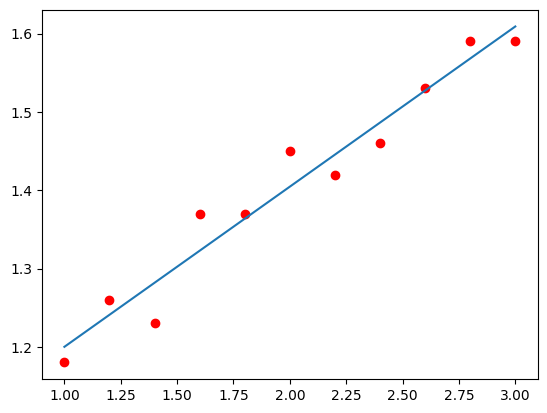

In [100]:
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59])

A = np.ones((x.size, 2))
b = y.reshape((y.size,1))

for i in range(x.size):
    A[i,0] = x[i]

def f(x, m, q):
    return m * x + q

def eqnorm(A, b):
    G = A.T @ A 
    condG = np.linalg.cond(G)
    print("Condizionamento G", condG)
    f = A.T @ b
    L = sc.linalg.cholesky(G, lower=True)
    Lt = L.T
    y, flag = Lsolve(L, f)
    if flag == 0:
        return Usolve(Lt, y)[0]
    
x_range = np.linspace(1.0, 3.0, 1000)
coeffs = eqnorm(A, b)
print(coeffs)
for x_n, y_n in zip(x, y):
    plt.plot(x_n, y_n, "ro")
plt.plot(x_range, f(x_range, coeffs[0], coeffs[1]))
plt.show()

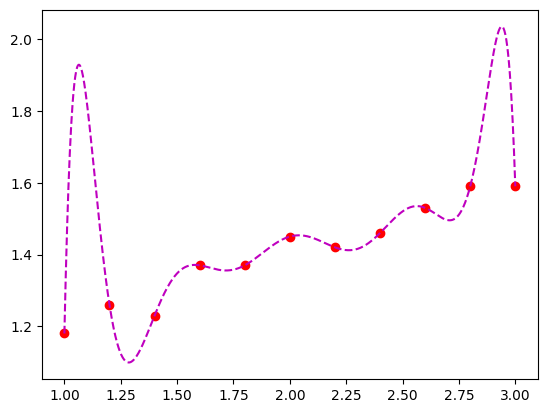

In [113]:
def plagr(xnodi,j):
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j], xnodi[j+1:n])    
    num= np.poly(xzeri)
    den= np.polyval(num, xnodi[j])
    p=num/den
    return p

def InterpL(x, y, xx):
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x, j)
        L[:,j]=np.polyval(p, xx)
     return L @ y

for x_n, y_n in zip(x, y):
    plt.plot(x_n, y_n, "ro")
plt.plot(x_range, InterpL(x, y, x_range), "m--")
plt.show()

In [115]:
pert = lambda x: .2 * x + 1

y_pert = np.array([pert(x_val) for x_val in x])

[1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6 ]


In [116]:
A1 = np.ones((x.size, 2))
b1 = y_pert.reshape((y_pert.size,1))
for i in range(x.size):
    A1[i,0] = x[i]

Condizionamento G 70.88589282069809
[[0.2]
 [1. ]]


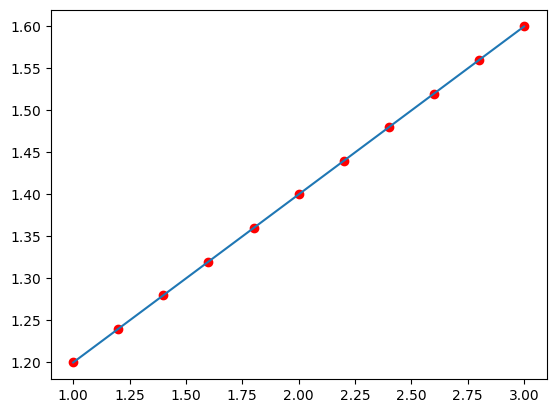

In [117]:
x_range = np.linspace(1.0, 3.0, 1000)
coeffs = eqnorm(A1, b1)
print(coeffs)
for x_n, y_n in zip(x, y_pert):
    plt.plot(x_n, y_n, "ro")
plt.plot(x_range, f(x_range, coeffs[0], coeffs[1]))
plt.show()

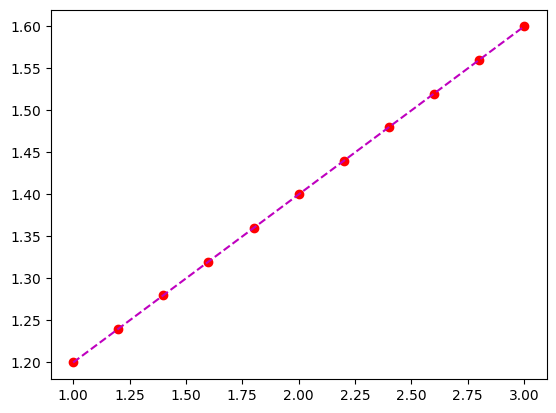

In [118]:
for x_n, y_n in zip(x, y_pert):
    plt.plot(x_n, y_n, "ro")
plt.plot(x_range, InterpL(x, y_pert, x_range), "m--")
plt.show()

## Domanda intelligenza artificiale

- Allenamento di una rete neurale: dopo aver descritto come è composta una rete neurale, descrivi in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**
- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**